In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
#getting the data
columns = ["polarity","id","date","query","username","tweet"]
df = pd.read_csv("tweets.csv",encoding = "iso-8859-1",names = columns)
df.head()

,polarity,id,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
#Different polarites
print(df["polarity"].value_counts()) # 4 = Positive 0 = Negative

4    800000
0    800000
Name: polarity, dtype: int64


In [5]:
df.shape # Total 1.6 million tweets

(1600000, 6)

In [6]:
# Will only use 300k tweets(150k pos and 150k neg)
# Seperating positive and negative tweets

pos_df = df[df["polarity"] == 4]
neg_df = df[df["polarity"] == 0]
pos_df.head()

,polarity,id,date,query,username,tweet
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [7]:
# Select only 50k tweets from both sets
pos_df = pos_df[:150000]
neg_df = neg_df[:150000]
print(pos_df.shape,neg_df.shape)

(150000, 6) (150000, 6)


In [8]:
# Concat both to create a new dataset
tweet_df = pd.concat([pos_df,neg_df],axis = 0,ignore_index = True)
print(tweet_df.shape)
tweet_df.head()

(300000, 6)


,polarity,id,date,query,username,tweet
0,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
1,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
2,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
4,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [9]:
tweet_df = tweet_df.drop(["id","date","query","username"],axis = 1)

In [10]:
# Dropping useless columns
tweet_df["polarity"] = tweet_df["polarity"].astype(int)
tweet_df.head()

,polarity,tweet
0,4,I LOVE @Health4UandPets u guys r the best!!
1,4,im meeting up with one of my besties tonight! ...
2,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,4,Being sick can be really cheap when it hurts t...
4,4,@LovesBrooklyn2 he has that effect on everyone


In [11]:
# Positive = 1 and Negative = 0
tweet_df["polarity"] = tweet_df["polarity"].apply(lambda x: 1 if x == 4 else 0)
tweet_df.head()

,polarity,tweet
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


In [12]:
#making training and testing sets(80/20 split)

pos_tweets = tweet_df[tweet_df["polarity"] == 1]
neg_tweets = tweet_df[tweet_df["polarity"] == 0]

train_df = pd.concat([pos_tweets[:120000],neg_tweets[:120000]],axis = 0,ignore_index = True)
test_df = pd.concat([pos_tweets[120000:],neg_tweets[120000:]],axis = 0,ignore_index = True)

print(train_df.head())
print(train_df.shape,test_df.shape)

   polarity                                              tweet
0         1       I LOVE @Health4UandPets u guys r the best!! 
1         1  im meeting up with one of my besties tonight! ...
2         1  @DaRealSunisaKim Thanks for the Twitter add, S...
3         1  Being sick can be really cheap when it hurts t...
4         1    @LovesBrooklyn2 he has that effect on everyone 
(240000, 2) (60000, 2)


In [13]:
import nltk
from nltk.corpus import stopwords
from  nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter


In [14]:
def remove_repeated_chars(word):
    if wordnet.synsets(word):
        return word
    reduced_word = re.sub(r"(\w*)(\w)\2(\w*)",r"\1\2\3",word)
    if reduced_word != word:
        return remove_repeated_chars(reduced_word)
    else:
        return reduced_word  

In [15]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
stop_words.append("quot")

class Bow(object):
    def __init__(self):
        self.pos_tweets_count = 0
        self.neg_tweets_count = 0
        self.bow = [Counter(),Counter()]

    def add_to_bow(self,label,tweet):
        tweet = re.sub(r"https?:\/\/\S+|www.\S+","",tweet) # removes links
        tweet = re.sub(r"@\S+|#"," ",tweet) # removes #tags (# only) and @user
        tweet = re.sub(r"\b\w{1,3}\b"," ",tweet) #removes words less than length 4
        tweet = re.sub(r"[^A-Za-z]"," ",tweet).lower().strip() # revoce special characters,numbers

        if label == 1:
            self.pos_tweets_count += 1
        else:
            self.neg_tweets_count += 1

        for word in tweet.split():
            if word not in stop_words:
                word = lemmatizer.lemmatize(word)
                word = remove_repeated_chars(word)
                self.bow[label][word] += 1   

In [16]:
# Populating the bag of words

bow = Bow()
for label,tweet in zip(train_df["polarity"],train_df["tweet"]):
    bow.add_to_bow(label,tweet)

In [17]:
bag_of_words = bow.bow
pos_tweets_count = bow.pos_tweets_count
neg_tweets_count = bow.neg_tweets_count
num_neg_words = len(bag_of_words[0])
num_pos_words = len(bag_of_words[1])

print(num_neg_words,num_pos_words)
common_pos_words = bag_of_words[1].most_common(20)
common_neg_words = bag_of_words[0].most_common(20)
print(common_neg_words)

41163 44484
[('work', 7810), ('today', 6112), ('like', 6027), ('back', 5700), ('going', 5199), ('want', 5045), ('time', 4954), ('good', 4620), ('really', 4602), ('still', 4465), ('miss', 4175), ('need', 3883), ('home', 3807), ('know', 3785), ('night', 3711), ('wish', 3683), ('feel', 3679), ('last', 3624), ('sleep', 3481), ('think', 3476)]


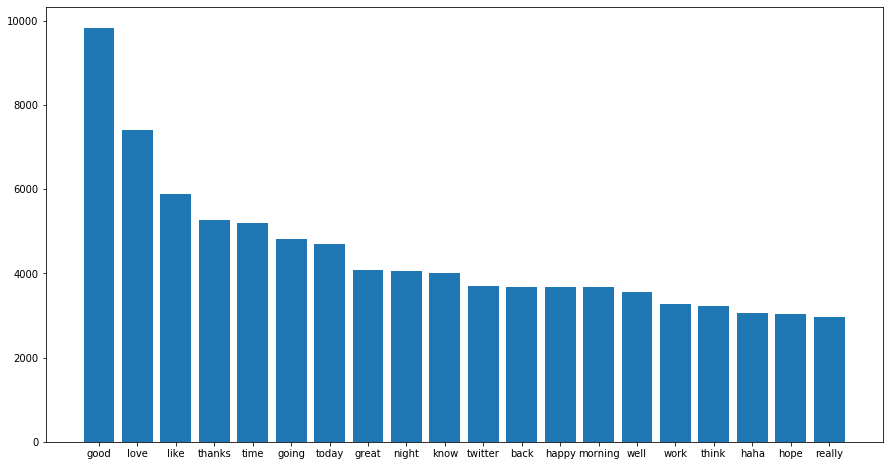

In [18]:
plt.figure(figsize=(15,8))
plt.bar([word for (word,_) in common_pos_words],[freq for (_,freq) in common_pos_words])
plt.draw()

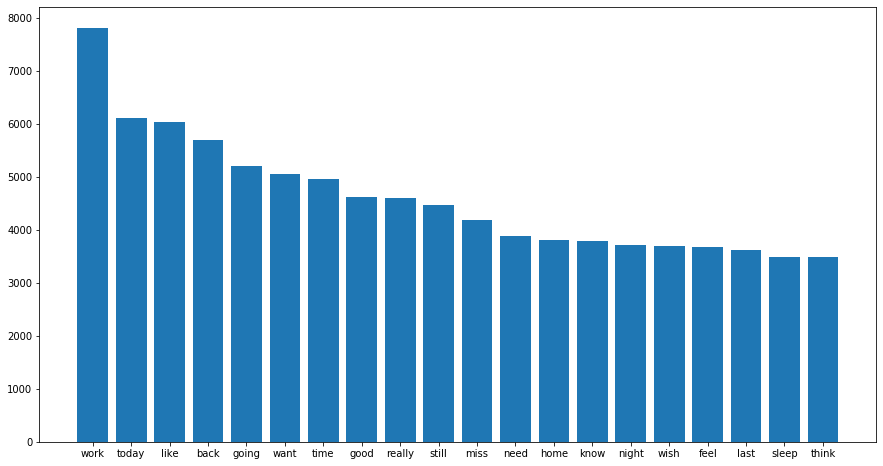

In [19]:
plt.figure(figsize=(15,8))
plt.bar([word for (word,_) in common_neg_words],[freq for (_,freq) in common_neg_words])
plt.draw()
# Looks like people don't like to work

In [35]:
# Making Counter of all words
all_words = list(set(list(bag_of_words[0]) + list(bag_of_words[1])))
# list of dictionaries for likelihood wrt to each class
word_likelihoods = [Counter(all_words),Counter(all_words)]
vocabulary = len(all_words)
print("Total number of words:", vocabulary)

Total number of words: 64928


In [48]:
# Calculate likelihood wrt to positive and negative class with add-1 smoothing
neg_words = bag_of_words[0]
pos_words = bag_of_words[1]
for word in all_words:
    word_likelihoods[1][word] = (pos_words[word] + 1) / (num_pos_words + vocabulary)
    word_likelihoods[0][word] = (neg_words[word] + 1) / (num_neg_words + vocabulary)
        
print(word_likelihoods[1][""],word_likelihoods[0]["sick"])

0.0024128980367784155 0.021745482651685816


In [46]:
# Calculate class priors
total_tweets = pos_tweets_count + neg_tweets_count
class_priors = [neg_tweets_count/total_tweets,neg_tweets_count/total_tweets]